<a href="https://colab.research.google.com/github/its-curzon/Logarithms-DataScience/blob/main/1970s_Boston_RE_Analysis_Logarithmic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> This is Boston. 1970.
<h2> We have the data to build a real estate price estimate model.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

db = pd.read_csv('data/boston.csv', index_col=0)
db.shape
#we've got 506 rows over 15 columns
#The first column was not useful, so we set the index column
#at index 0
print(f"There are {db.shape[0]} rows, and {db.shape[1]} columns.")

There are 506 rows, and 14 columns.


In [ ]:
#we can change up how the float numbers process
#we want a comma for thousands and up and two decimal places
pd.options.display.float_format='{:,.2f}'.format

In [ ]:
db.info()
#all with the float data type, or numbers with decimals

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [ ]:
#Let's look closer at the column names
db.columns
#a little confusing but, we do have the data.
#we will need to know what all these mean,
#this is why it is very important to label your
#data clearly and in a way that anyone could understand it
#at a glance.

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset] [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


In [ ]:
db.isna().sum()
#no NaN values to clean

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
db.duplicated().sum()
#and we have no duplicates.

np.int64(0)

<h2> Now we can look at the data.

In [ ]:
#Let's see how many students per teacher on average.
stu_avg = db.PTRATIO.mean()
print(f"The average student-teacher-ratio is roughly {int(stu_avg)} to 1.")

The average student-teacher-ratio is roughly 18 to 1.


In [ ]:
#Let's get the average price of the homes.
avg_price = db.PRICE.mean()
print(f"The average home price is around ${int(avg_price)},000.")

The average home price is around $22,000.


In [ ]:
#How about homes out by the Charles River?
rvr_homes = db.CHAS.sum()
print(f"There are {int(rvr_homes)} homes for sale next to the Charles River.")

There are 35 homes for sale next to the Charles River.


In [ ]:
#What about rooms? What're the biggest and the smallest houses on the market?
big_h = db.RM.max()
small_h = db.RM.min()
print(f'The biggest house has an average of {big_h} rooms; the smallest has {small_h}')

The biggest house has an average of 8.78 rooms; the smallest has 3.561


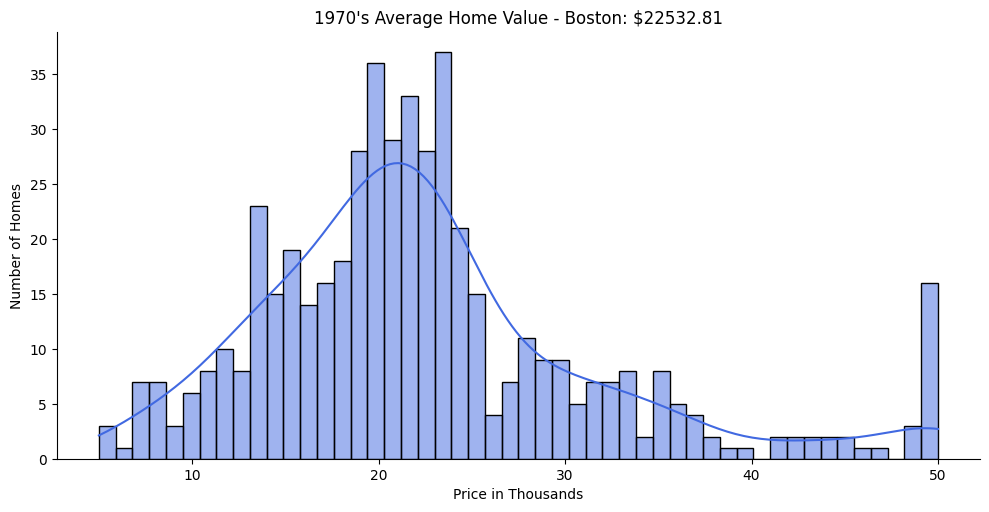

In [ ]:
#Now i'll put some info into a histograph featuring a kde, or a probability
#density line.
#Let's start with home prices, and number of homes.
#We will use a Seaborn displot
sns.displot(db['PRICE'],
            bins=50,
            aspect=2,
            kde=True,
            color='royalblue')
plt.title(f"1970's Average Home Value - Boston: ${(1000*db.PRICE.mean()):.7}")
plt.xlabel('Price in Thousands')
plt.ylabel('Number of Homes')

plt.show()

<h1>There's a big spike on the high end!
<h3>I'll have a look at that coming up.

<h2> Potential Commute


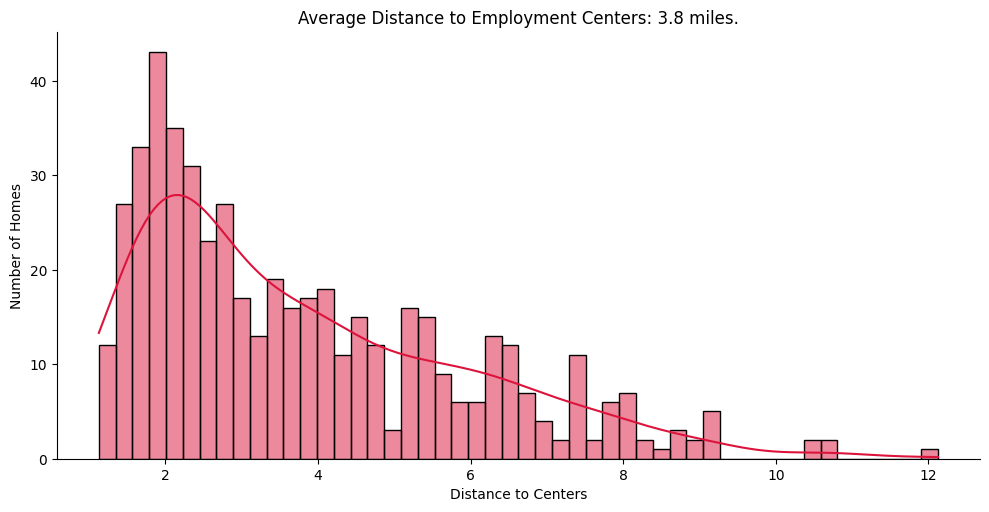

In [ ]:
#How about now, the average length of the commute to the 5 main
#employment centers in Boston?

sns.displot(db.DIS,
            bins=50,
            aspect=2,
            kde=True,
            color='crimson')
plt.title(f"Average Distance to Employment Centers: {(db.DIS.mean()):.2} miles.")
plt.xlabel('Distance to Centers')
plt.ylabel('Number of Homes')
plt.show()



<h1> Most homes listed are within 4 miles of the stated Employment Centers.

<h2> Average Number of Rooms

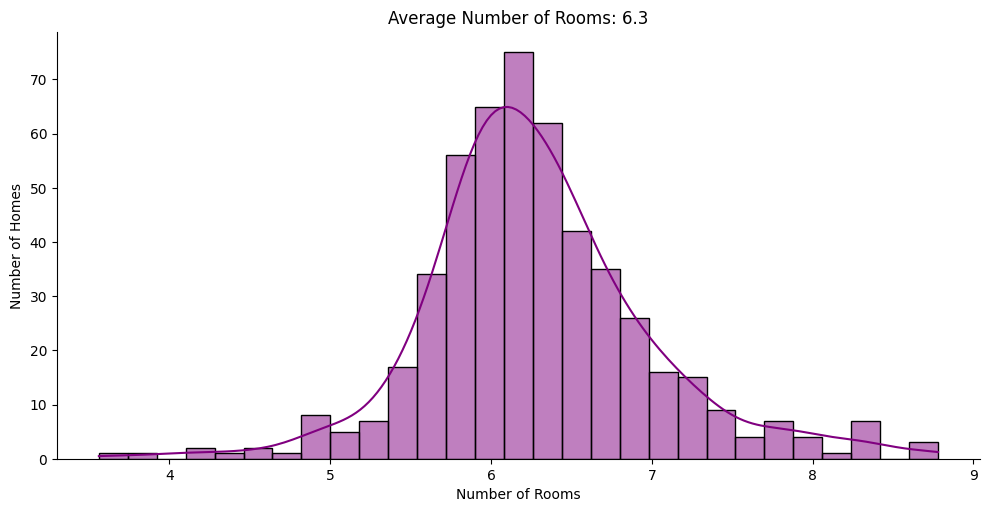

In [ ]:
#Let's check out what these homes look like. How many average rooms?
sns.displot(db.RM,
            aspect=2,
            kde=True,
            color='purple')
plt.title(f"Average Number of Rooms: {(db.RM.mean()):.2}")
plt.xlabel("Number of Rooms")
plt.ylabel("Number of Homes")
plt.show()

<H1> Most of the homes had over 5 rooms!

<h2> Access to Major Road

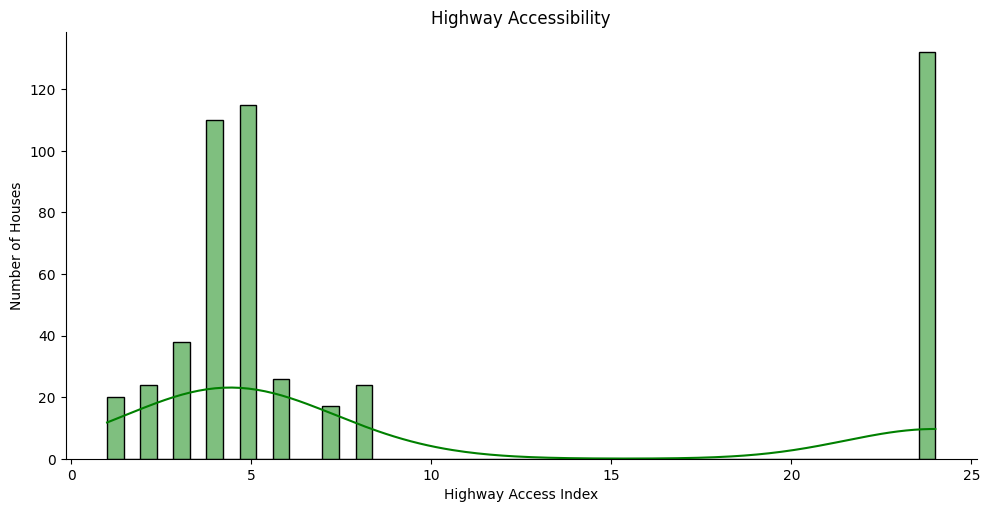

In [ ]:
#Let's check on this stat that deals with highway access.
sns.displot(db.RAD,
            bins=50,
            aspect=2,
            kde=True,
            color='green')
plt.title("Highway Accessibility")
plt.xlabel("Highway Access Index")
plt.ylabel("Number of Houses")
plt.show()

<h1> Big gaps in the data! The higher the index, the better the highway access.

<h2>Direct Charles River Access

In [ ]:
#Let's visualize how many homes are on the Charles River now.
river_homes = db.CHAS.value_counts()
bar = px.bar(x=['No', 'Yes'],
             y=river_homes.values,
             color=river_homes.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Next to Charles River?')
bar.update_layout(xaxis_title='Property on Charles River?',
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()
print(f"Number of Total Charles River Homes: {int(db.CHAS.sum())}")

Number of Total Charles River Homes: 35


<h1> Other questions from the data:
<h2> 1. Is there a trend between pollution and distance to employment centers?
<h2>2. How does home size affect pricing?
<h2>3. What correlation exists between area poverty levels (LSTAT) and pricing?



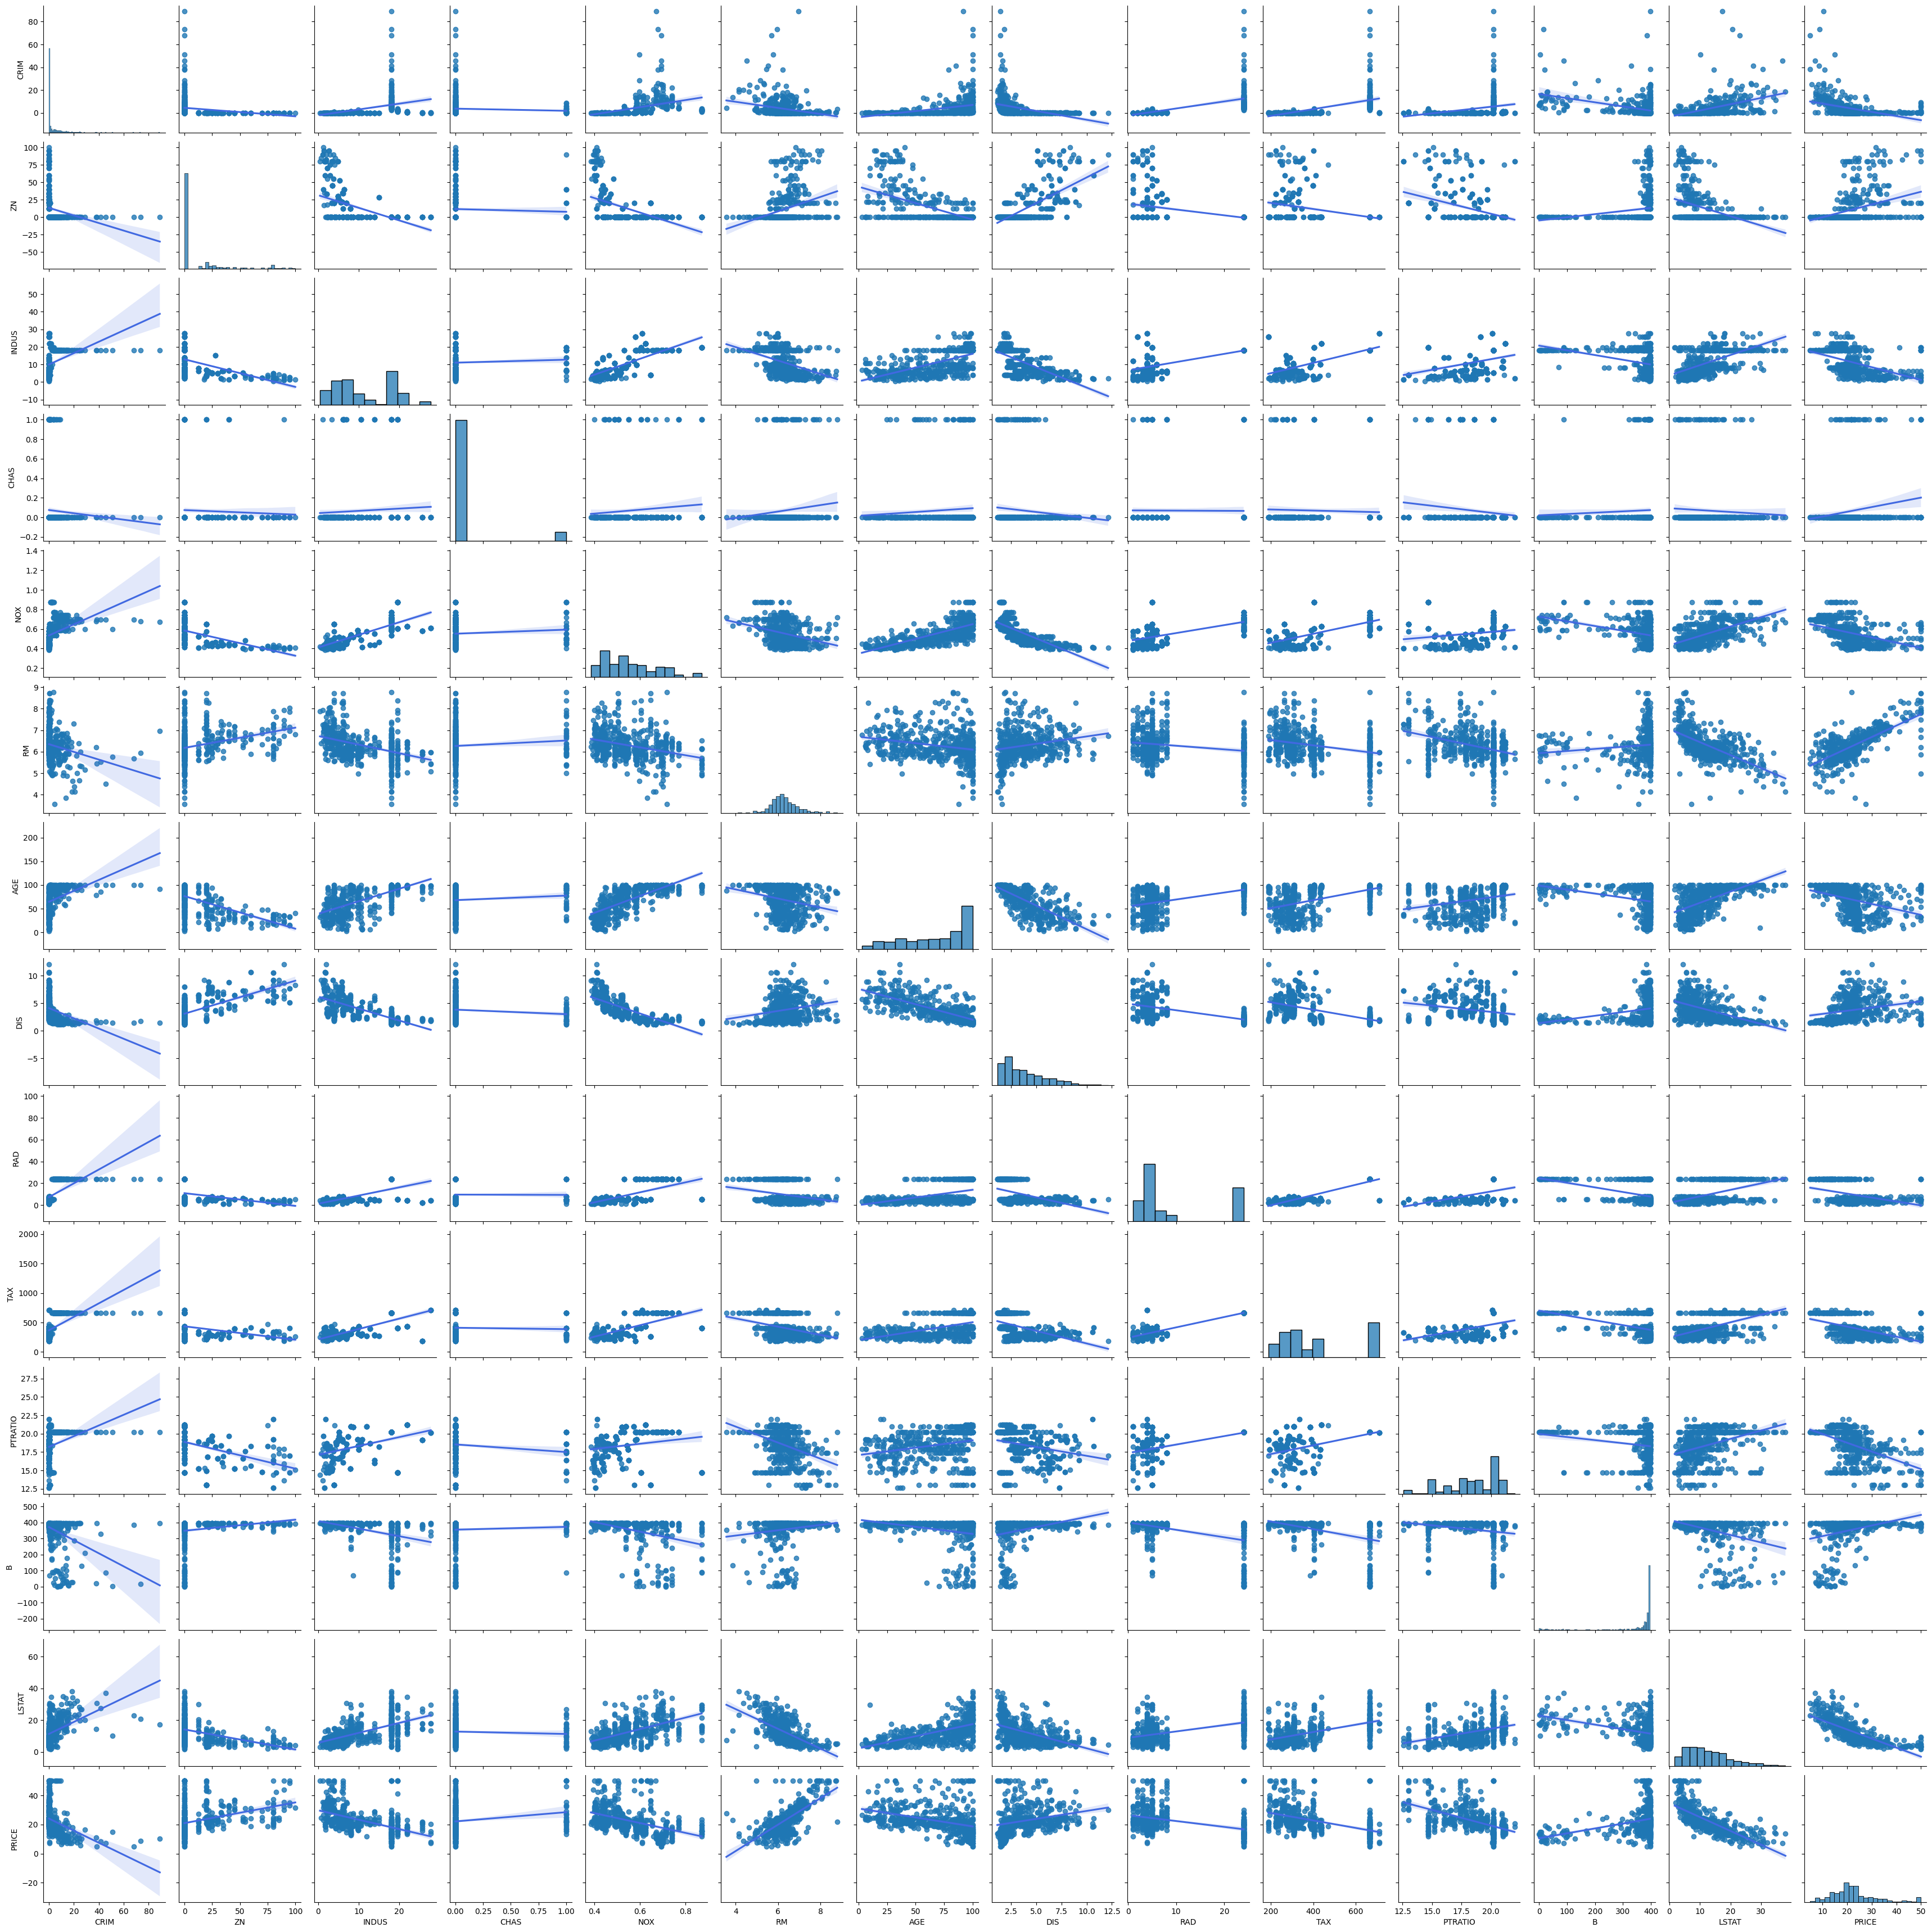

In [ ]:
#Let's make a Seaborn pairplot, it'll show us every
#statistical relationship in our data. this is a big undertaking
sns.pairplot(db, kind='reg', plot_kws={'line_kws':{'color': 'royalblue'}})
plt.show()
#This is a massive grid, luckily we can jointplot them down.
#lets answer our questions

Distance from Work Areas vs Nitric Oxide Concentration

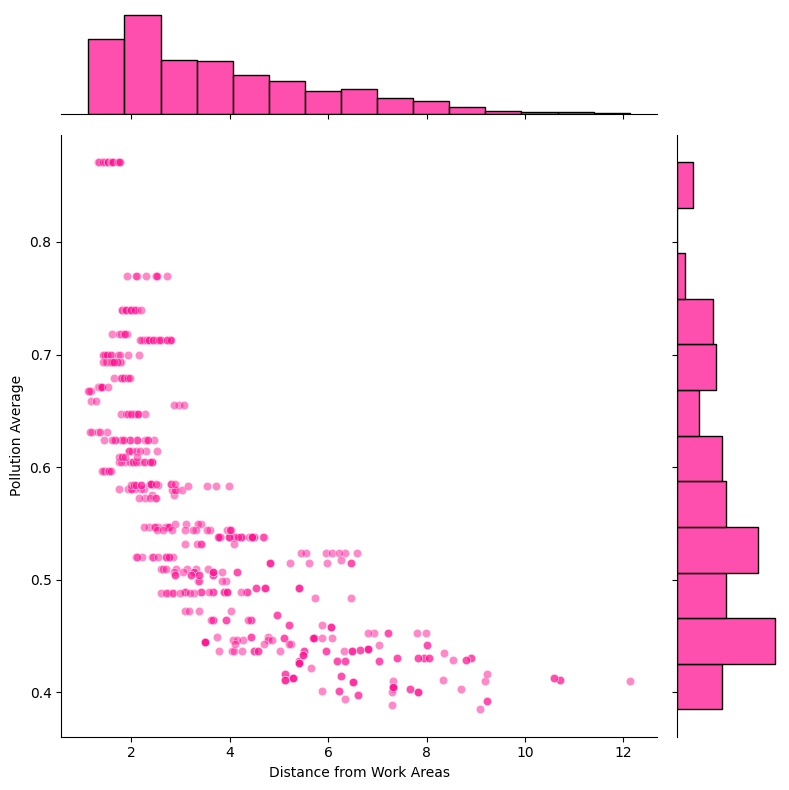

In [ ]:
#First for the distance from work, and pollution
sns.jointplot(x=db.DIS,
              y=db.NOX,
              height=8,
              kind='scatter',
              color='deeppink',
              joint_kws={'alpha':0.5})
plt.ylabel("Pollution Average")
plt.xlabel("Distance from Work Areas")

plt.show()

<h2> As expected, as the distance increases, the pollution index decreases.
<h3> Note that Nitric Oxide pollution is still found up to 12 miles away from the area.

<h2> Non-Retail Industry vs Nitric Oxide Pollution

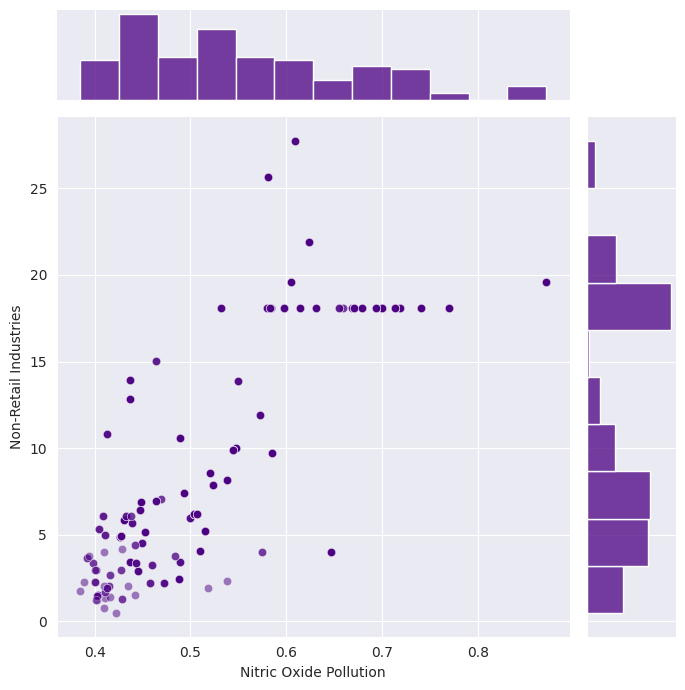

In [ ]:
#Let's now compare the proportion of non-retail industry and pollution index
#with another good old jointplot
with sns.axes_style('darkgrid'):
  sns.jointplot(x=db.NOX,
                y=db.INDUS,
                height=7,
                color='indigo',
                joint_kws={'alpha':0.5})
  plt.ylabel("Non-Retail Industries")
  plt.xlabel("Nitric Oxide Pollution")

  plt.show()

<h1> The closer the industry, the more potential pollution in the area.
<h3> Checks out.

<h1> Lower Income Population vs Average Number of Rooms

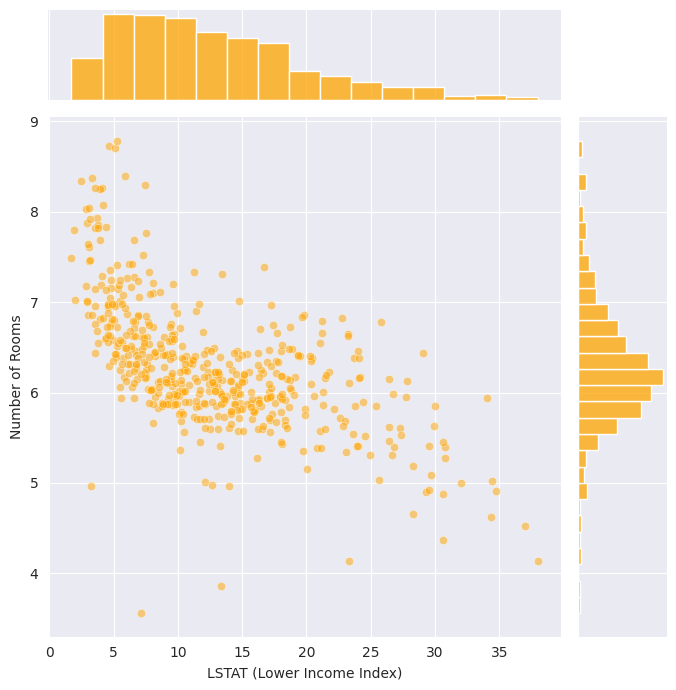

In [ ]:
#Now about the lower income population and the average number of rooms.
#less income, smaller house?
with sns.axes_style('darkgrid'):
  sns.jointplot(x=db.LSTAT,
                y=db.RM,
                height=7,
                color='orange',
                joint_kws={'alpha':0.5})
  plt.ylabel("Number of Rooms")
  plt.xlabel("LSTAT (Lower Income Index)")
  plt.show()

<h3> When the "LSTAT" is lower, homes tend to have more rooms.

<h1>LSTAT vs Home Price

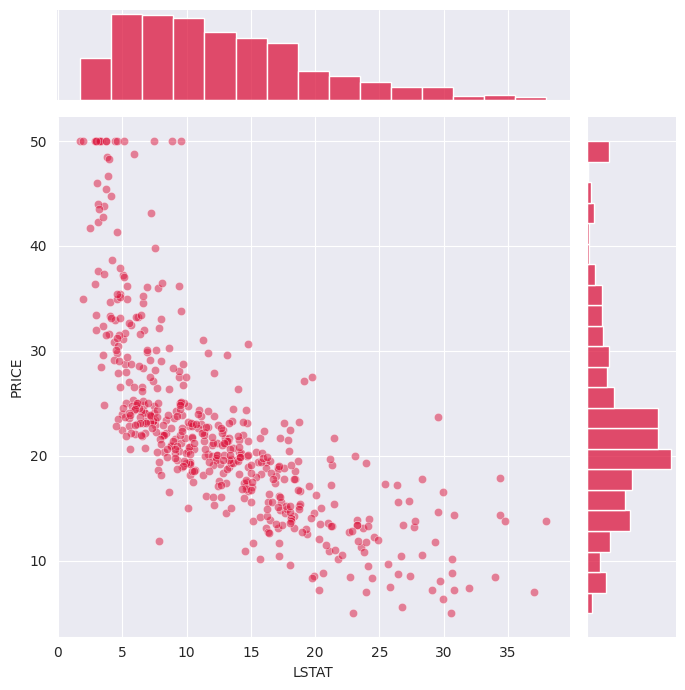

In [ ]:
#and now LSTAT can be compared to average price.
with sns.axes_style('darkgrid'):
  sns.jointplot(x=db.LSTAT,
                y=db.PRICE,
                height=7,
                color='crimson',
                joint_kws={'alpha':0.5})

plt.show()

<h1> Nearly identical to the number of rooms graph.
<h3> That means for certain there is correlation between number of rooms and home price. Check it out.

<h1> Number of Rooms vs Home Price

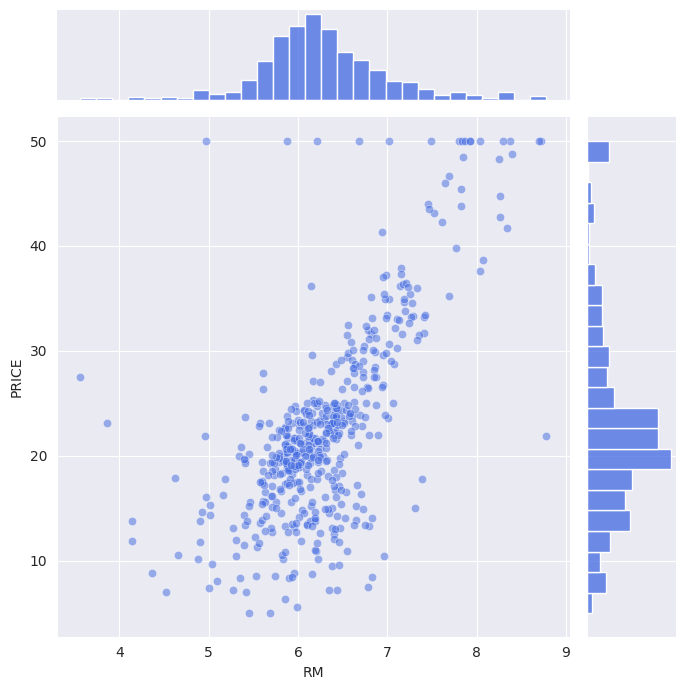

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=db.RM,
                y=db.PRICE,
                height=7,
                color='royalblue',
                joint_kws={'alpha':0.5})
  plt.show()

<h1> And there it is...
<h2> Considering most homes for sale in Boston in 1970 had between 5 and 7 rooms, the trend isn't as clear, but it exists.
<h2> There may have been a cap for home price.
<h2> Now I want to examine those homes that were on the extreme end of price from earlier.

<h1> Training and Test Dataset


In [ ]:
#Lets use this Machine Learning train_test_split function from sklearn
#this grabs a random 80/20 split of our data,
#uses the around 80% as training data,
#then uses the remainder to train the model for future price predictions
#based upon all other available info
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#target is the price
target = db.PRICE
#features is the rest of the data, minus price
features = db.drop('PRICE', axis=1)
#these are the ML train and test variables
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)
train_pct = 100*len(X_train)/len(features)
print(f"Traning data is {train_pct:.3}% of the total data.")
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f"Test data makes up the remaining {test_pct:0.3}%.")

Traning data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


<h1> Using 'Multivariable' Regression, we can see our r-squared score which scores how well our model predicted the rest of the data.

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
rsqrd = reg.score(X_train, y_train)
print(f"Training data r-squared: {rsqrd:.2}")

Training data r-squared: 0.75


<h1> .75! This...is a good score, but not perfect.
<h2> Let's check out our regression coefficients!
<h3> The higher, the better; the lower (negative) the worse the effect on price.

In [ ]:
regr_coef = pd.DataFrame(data=reg.coef_,
                         index=X_train.columns,
                         columns=['Coefficient'],
                        )
regr_coef


,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


<h1> Pollution can really destroy a home's value!
<h2> But we see that the number of rooms is a big, positive coefficient of 3.11!
<h3> Let's examine.

In [ ]:
#Lets see how much value a room adds to a home according to our model.
value = regr_coef.loc['RM'].values[0] * 1000
print(f'The added value per room is ${value:.5}0')

The added value per room is $3108.50


<h1> The value added to a home per room is over $3,000.

<h1> Let's analyse the estimated values.

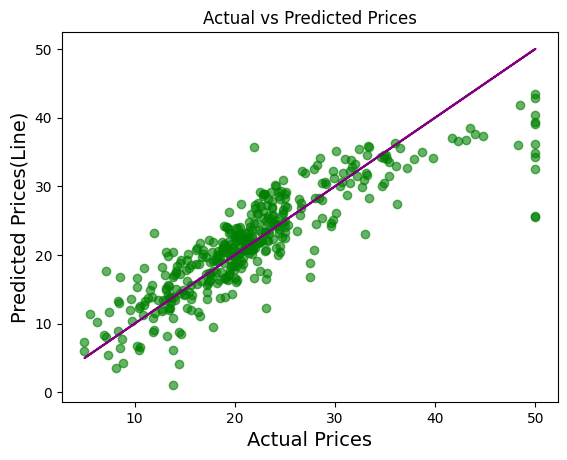

In [ ]:
#we have our estimated values, and our residuals, or the stuff that didn't fit
#the model predictively.
est_vals = reg.predict(X_train)
residuals = (y_train - est_vals)
#then, lets throw them in a scatter graph.
plt.figure(dpi=100)
plt.scatter(x=y_train,
            y=est_vals,
            c='green',
            alpha=0.6)
plt.plot(y_train, y_train, color='purple')
plt.title("Actual vs Predicted Prices")
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices(Line)', fontsize=14)
plt.show()



<h1>Checking our residuals...

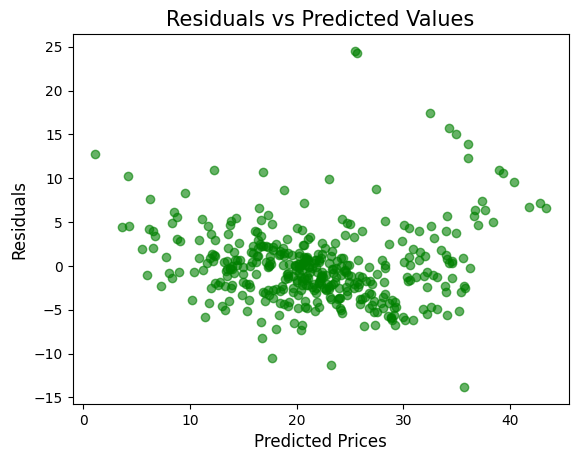

In [ ]:
#Then we check out residuals or our model errors
#against the models predicted values
plt.figure(dpi=100)
plt.scatter(x=est_vals, y=residuals, c='green', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=15)
plt.xlabel('Predicted Prices', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()

<h1> Our residuals thankfully don't show a trend or pattern, or we'd have a biased model.

<h1>Examining the skew and mean

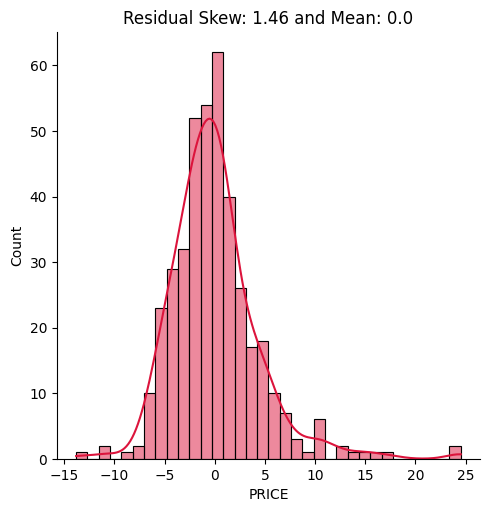

In [ ]:
#let's analyse the distribution of the residuals, esp. the skew and mean.
r_mean = round(residuals.mean(), 2)
r_skew = round(residuals.skew(), 2)
sns.displot(residuals,
            kde=True,
            color='crimson')
plt.title(f"Residual Skew: {r_skew} and Mean: {r_mean}")
plt.show()

<h2> There is some room for improvement. Let's see if we can adjust the data better.

<h1>Transform Data for Fit

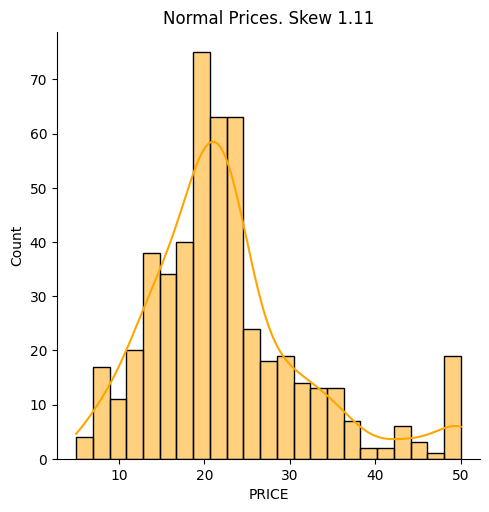

In [ ]:
#instead of changing our model,
#we can transform the data to fit our linear model
#lets see if we can put 'PRICE' through a log transformation.
t_skew = db.PRICE.skew()
sns.displot(db.PRICE, kde=True, color='orange')
plt.title(f"Normal Prices. Skew {t_skew:.3}")
plt.show()

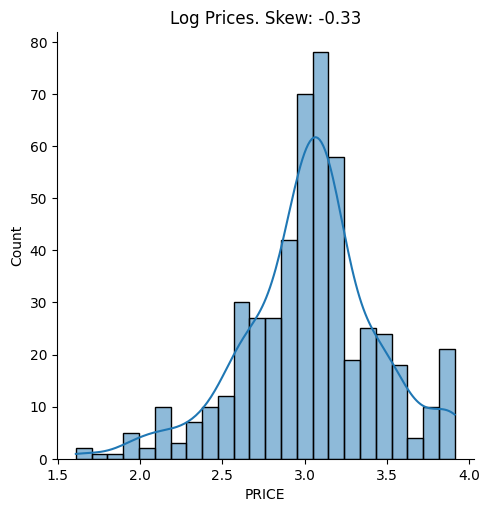

In [ ]:
#we want to add a log function to the Price-
#That can help eliminate those high, out of pattern house prices.
y_log = np.log(db.PRICE)
#bring back our kde line
sns.displot(y_log,kde=True)
plt.title(f"Log Prices. Skew: {y_log.skew():.3}")
plt.show()

In [ ]:
#We can log transform the prices to deal with the skew down on the high end!

<h3>Higher prices are effected more by log transformation, which compresses the numbers logarithmically to help the skew in our data.

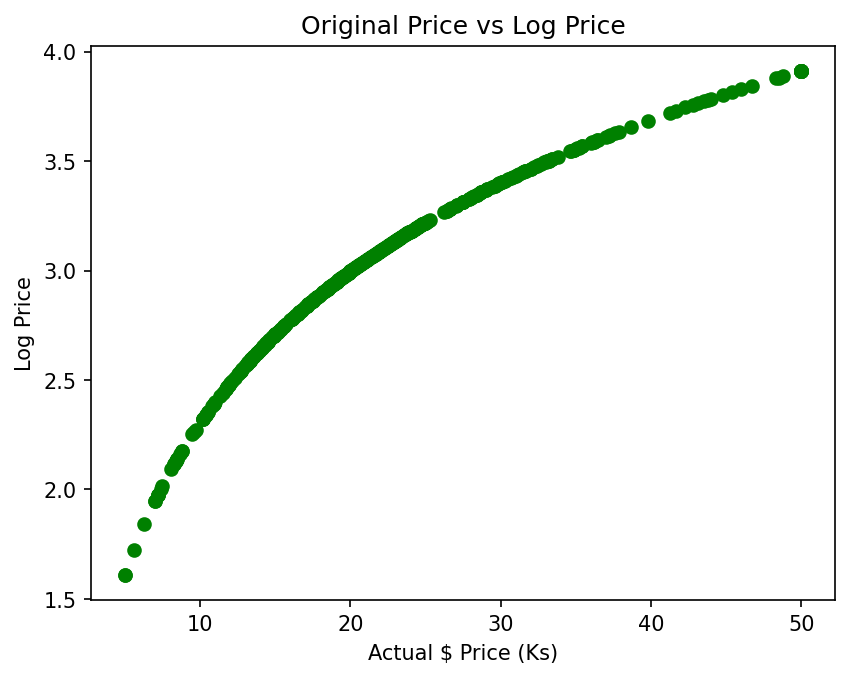

In [ ]:
#Let's see the difference here.
plt.figure(dpi=150)
plt.scatter(db.PRICE, np.log(db.PRICE), color='green')
plt.title('Original Price vs Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price (Ks)')
plt.show()

<h1> Now we can re-run our regression using log prices.

In [ ]:
from sklearn.model_selection import train_test_split
#we grab our logarithmed prices
log_p = np.log(db.PRICE)
#and the rest of our data minus the price column
features = db.drop('PRICE', axis=1)
#get our train/test X,y
X_train, X_test, log_y_train, log_y_test = train_test_split(features,
                                                            log_p,
                                                            test_size=0.2,
                                                            random_state=10)


In [ ]:
#then run our linear regression, with the X_training portion and the
#logarithmed price data training portion
log_reg = LinearRegression()
log_reg.fit(X_train, log_y_train)
#And hopefully an improved model!
log_rsquared = log_reg.score(X_train, log_y_train)

log_pred = log_reg.predict(X_train)
log_res = (log_y_train - log_pred)

print(f"Training data r-squared: {log_rsquared:.2}")

Training data r-squared: 0.79


<h1> This is a decent improvement of .04.

In [ ]:
#Let's again check the coefficients
db_coef = pd.DataFrame(data=log_reg.coef_, index=X_train.columns, columns=['coef'])
db_coef

,coef
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


<h1> Interpreting logarithmic coefficients

<h3> Now that our skew has been managed, we can see that homes next to the Charles River (CHAS) experience higher home prices.
<h3>Where as a higher student:teacher ratio (PTRATIO) has the opposite effect.

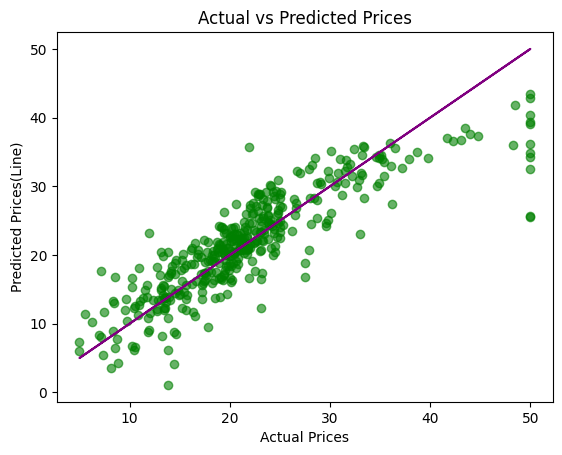

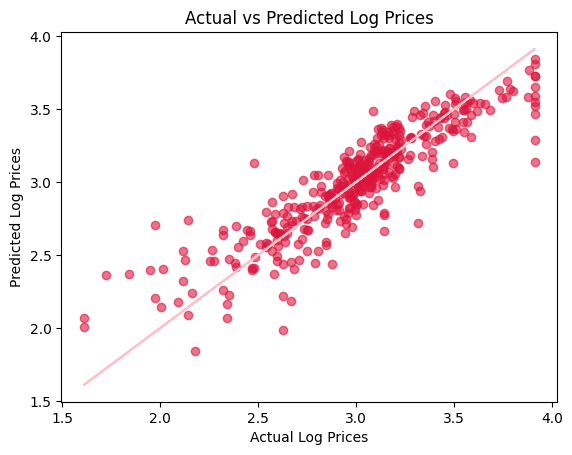

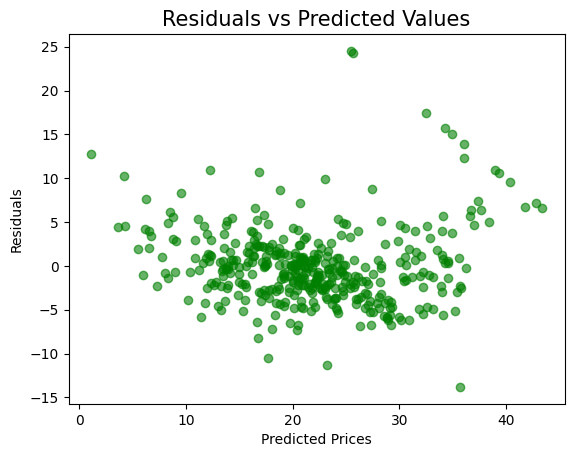

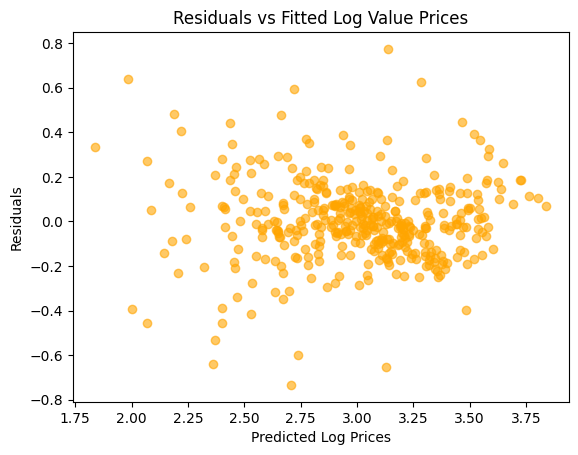

In [ ]:
import matplotlib.pyplot as plt

#we have our estimated values, and our residuals, or the stuff that didn't fit
#the model predictively.
est_vals = reg.predict(X_train)
residuals = (y_train - est_vals)
#then, lets throw them in a scatter graph.
plt.figure(dpi=100)
plt.scatter(x=y_train,
            y=est_vals,
            c='green',
            alpha=0.6)
plt.plot(y_train, y_train, color='purple')
plt.title("Actual vs Predicted Prices")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices(Line)')
plt.show()

#Now get the Actual vs. Predicted Log Prices
plt.figure(dpi=100)
plt.scatter(x=log_y_train, y=log_pred,c='crimson', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='pink')
plt.title(f"Actual vs Predicted Log Prices")
plt.xlabel('Actual Log Prices')
plt.ylabel('Predicted Log Prices')
plt.show()

#Then we check out residuals or our model errors
#against the models predicted values
plt.figure(dpi=100)
plt.scatter(x=est_vals, y=residuals, c='green', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=15)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

#residuals vs predicted values (Log prices)
#log_pred = log_reg.predict(X_train)
#log_res = (log_y_train - log_pred)
plt.figure(dpi=100)
plt.scatter(x=log_pred, y=log_res, c='orange', alpha=0.6)
plt.title("Residuals vs Fitted Log Value Prices")
plt.xlabel("Predicted Log Prices")
plt.ylabel("Residuals")
plt.show()



<h1> Now for the mean and skew, again.

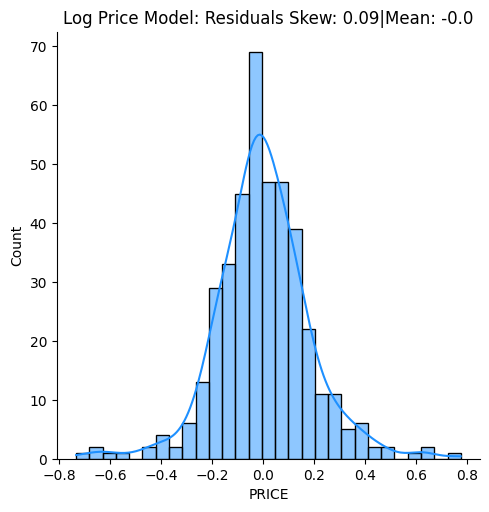

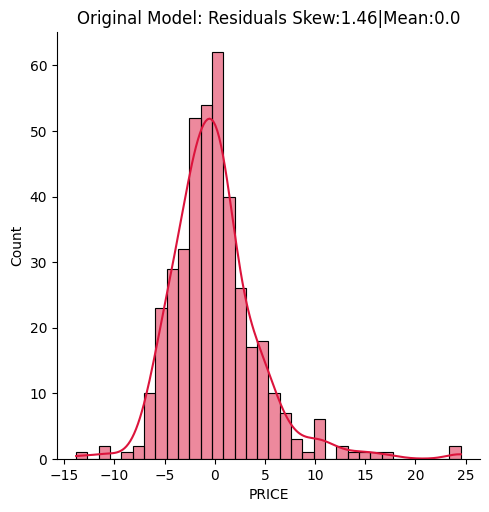

In [ ]:
#lets check out the log residuals mean and skew
log_resid_mean = round(log_res.mean(),2)
log_resid_skew = round(log_res.skew(),2)

#and make the displot
sns.displot(log_res, kde=True, color='dodgerblue')
plt.title(f"Log Price Model: Residuals Skew: {log_resid_skew}|Mean: {log_resid_mean}")
plt.show()

sns.displot(residuals, kde=True, color='crimson')
plt.title(f"Original Model: Residuals Skew:{r_skew}|Mean:{r_mean}")
plt.show()

<h1> Now that's some improvement on the skew.

<h3> Now the real test - New Data.
<h3> Let's compare the rsquared of the two models (original, log)!

In [ ]:
print(f"Original Model Test Data r-squared:{reg.score(X_test, y_test):.2}")
print(f"Log Model Test Data r-squared: {log_reg.score(X_test, log_y_test):.2}")

Original Model Test Data r-squared:0.67
Log Model Test Data r-squared: 0.74


<h1> Useful, but slightly flawed.

In [ ]:
#Let's find the overall property mean
features=db.drop(['PRICE'], axis=1)
average_vals = features.mean().values
prop_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                         columns=features.columns)
prop_stats


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


<h1> We can now attempt to predict how much the average property is worth using the rest of our stats.

In [ ]:
#Prediction
log_est = log_reg.predict(prop_stats)[0]
print(f'Log Price Estimate: ${log_est:.3}')

#current Log Prices to Dollar Values
money_est = np.exp(log_est) * 1000
print(f"Estimated property value ${money_est:.6}")

Log Price Estimate: $3.03
Estimated property value $20703.2


<h1> An average home, with the average number of average features, had a value of $20,700.
<h2> To wrap up, let's test this with actual values.

In [ ]:
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = db.NOX.quantile(q=0.75)#high
LSTAT = db.LSTAT.quantile(q=0.25)#relatively low

prop_stats['RM'] = nr_rooms
prop_stats['PTRATIO'] = students_per_classroom
prop_stats['DIS'] = distance_to_town

if next_to_river:
  prop_stats['CHAS'] = 1
else:
  prop_stats['CHAS'] = 0

prop_stats['NOX'] = pollution
prop_stats['LSTAT'] = LSTAT

#Prediction
log_est = log_reg.predict(prop_stats)[0]
print(f"The log price estimate is ${log_est:.3}")

#convert to dollar values
money_est = np.exp(log_est) * 1000
print(f"The property is estimated to be worth ${money_est:.6}")

The log price estimate is $3.25
The property is estimated to be worth $25792.0
